In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
from sklearn.datasets import load_boston

In [2]:
X_train, y_train = load_boston(return_X_y=True)

In [3]:
def normalise(X):
    for i in range(X.shape[1]-1):
        X[:, i] = (X[:,i] - X[:,i].mean())/ (X[:,i].std())

    return X 

In [4]:
#add a new colum with ones to X
def addNewColumn(X):

    new_column = np.array([1]*X.shape[0])
    X = np.insert(normalise(X), 0, new_column,axis=1)
    return X


In [5]:
#initialise thetas 
def thetas(X, initial_value):
    return np.array([initial_value]*X.shape[1])


In [6]:
def h(X, theta):
    return np.dot(X, theta)

In [7]:
def J(X, theta, y):
    return (1/(2*X.shape[0]))*np.dot((h(X, theta) - y ).T, h(X,theta)-y)

In [8]:
def gradientDescent(X, y, alpha, num_epochs):
    J_hist = []
    theta = thetas(X, 0.0)
    for epoch in range(num_epochs):
        H = h(X, theta)
        J_hist.append(J(X, theta, y))
        descent = alpha*( (1/X.shape[0])* np.dot( (X.T), H - y )  )
        theta = theta - descent

    return J_hist, theta
        


In [9]:

def fit(X, y, alpha, num_epochs ):
    #feature scaling 
    X =  normalise(X)
    # add new column of 1's to X
    X = addNewColumn(X)
    # Returns the cost function and the final theta values
    J_values, params = gradientDescent(X, y, alpha, num_epochs)

    print('Final Cost function value ---->' , str(J_values[-1]))
    print('Parameters of the linear regression ---->',"\n", str(params))
    print()
    plt.plot(J_values)
    plt.title('Cost function for alpha = '+ str(alpha))
    plt.xlabel('Iterations')
    plt.ylabel('Cost function')

    return J_values, params


def predict(X_test, model):
    X_test =normalise(X_test)
    X_test = addNewColumn(X_test)
    return np.dot(X_test, model[1])






Final Cost function value ----> 111.4884434958582
Parameters of the linear regression ----> 
 [ 0.81622324 -0.56229921  0.50030138 -0.71018611  0.19326955 -0.65630469
  0.98817674 -0.63904747  0.43469861 -0.542807   -0.65341697 -0.62467335
  0.47137339  1.18853924]



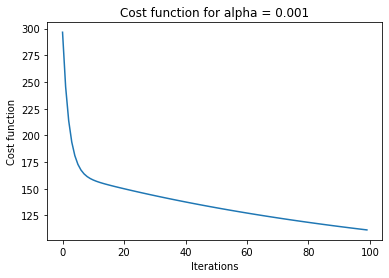

In [11]:
model = fit(X_train[:-2, :], y_train[:-2], alpha=0.001, num_epochs=100)